In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
anime_dataset = pd.read_csv('../anime_dataset.csv')
anime_dataset.replace(-500, np.nan, inplace=True)

In [90]:
anime_dataset.head()

,anime,score,popularity,season_start,year_start,season_end,year_end,num_episodes,anime_type
0,Fullmetal Alchemist: Brotherhood,9.24,1476428,Apr,2009,Jul,2010,64.0,TV
1,Shingeki no Kyojin Season 3 Part 2,9.17,301513,Apr,2019,Jul,2019,10.0,TV
2,Steins;Gate,9.13,1229031,Apr,2011,Sep,2011,24.0,TV
3,Gintama°,9.12,256417,Apr,2015,Mar,2016,51.0,TV
4,Hunter x Hunter (2011),9.12,935814,Oct,2011,Sep,2014,148.0,TV


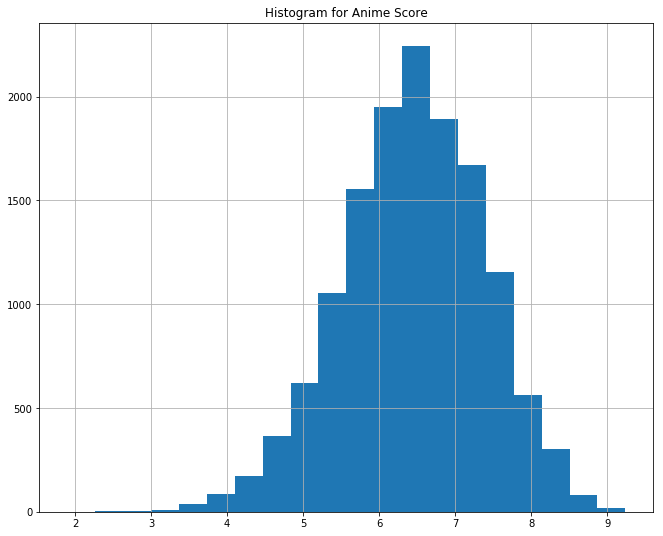

In [91]:
ax = anime_dataset.score.hist(bins=20, figsize=(11,9))
ax.set_title('Histogram for Anime Score')
plt.show()

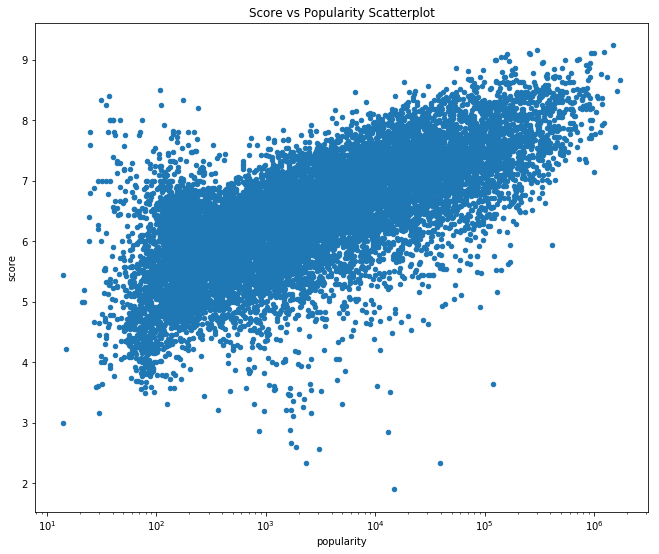

In [92]:
ax = anime_dataset.plot.scatter('popularity', 'score', figsize=(11,9), logx=True)
ax.set_title('Score vs Popularity Scatterplot')
plt.show()

In [93]:
#score_standardized = (anime_dataset.score - anime_dataset.score.mean()) / anime_dataset.score.std()
#popularity_standardized = (anime_dataset.popularity - anime_dataset.popularity.mean()) / anime_dataset.popularity.std()
anime_dataset['score_popularity_ratio'] = anime_dataset.score / anime_dataset.popularity

In [94]:
anime_dataset[(anime_dataset.popularity > 1e5) &
              (anime_dataset.score < 8)].dropna(subset=['score_popularity_ratio']).\
                                       sort_values(by='score_popularity_ratio').head(10)

,anime,score,popularity,season_start,year_start,season_end,year_end,num_episodes,anime_type,score_popularity_ratio
1498,Sword Art Online,7.56,1541964,Jul,2012,Dec,2012,25.0,TV,0.000005
612,Tokyo Ghoul,7.96,1236734,Jul,2014,Sep,2014,12.0,TV,0.000006
673,Naruto,7.92,1179776,Oct,2002,Feb,2007,220.0,TV,0.000007
885,Mirai Nikki,7.81,1130728,Oct,2011,Apr,2012,26.0,TV,0.000007
3154,Sword Art Online II,7.14,997772,Jul,2014,Dec,2014,24.0,TV,0.000007
925,Ao no Exorcist,7.78,1013081,Apr,2011,Oct,2011,25.0,TV,0.000008
1098,Elfen Lied,7.71,946846,Jul,2004,Oct,2004,13.0,TV,0.000008
959,Akame ga Kill!,7.76,940223,Jul,2014,Dec,2014,24.0,TV,0.000008
727,Bleach,7.88,943151,Oct,2004,Mar,2012,366.0,TV,0.000008
2440,Highschool of the Dead,7.31,851230,Jul,2010,Sep,2010,12.0,TV,0.000009


In [95]:
anime_dataset[(anime_dataset.popularity > 1e5) &
              (anime_dataset.score > 8)].dropna(subset=['score_popularity_ratio']).\
                                       sort_values(by='score_popularity_ratio').tail(10)

,anime,score,popularity,season_start,year_start,season_end,year_end,num_episodes,anime_type,score_popularity_ratio
99,Sayonara no Asa ni Yakusoku no Hana wo Kazarou,8.51,111778,Feb,2018,Feb,2018,1.0,Movie,0.000076
242,Little Busters!: Refrain,8.30,108909,Oct,2013,Dec,2013,13.0,TV,0.000076
411,Dennou Coil,8.12,105868,May,2007,Dec,2007,26.0,TV,0.000077
311,Tengen Toppa Gurren Lagann Movie 1: Gurren-hen,8.21,107007,Sep,2008,Sep,2008,1.0,Movie,0.000077
358,Yahari Ore no Seishun Love Comedy wa Machigatt...,8.17,105243,Oct,2016,Oct,2016,1.0,OVA,0.000078
309,Princess Tutu,8.21,105504,Aug,2002,May,2003,38.0,TV,0.000078
437,Fullmetal Alchemist: Brotherhood Specials,8.10,101402,Aug,2009,Aug,2010,4.0,Special,0.000080
497,Final Fantasy VII: Advent Children Complete,8.05,100696,Apr,2009,Apr,2009,1.0,OVA,0.000080
276,Gyakkyou Burai Kaiji: Hakairoku-hen,8.27,102373,Apr,2011,Sep,2011,26.0,TV,0.000081
294,Kuroko no Basket Movie 4: Last Game,8.23,101325,Mar,2017,Mar,2017,1.0,Movie,0.000081


In [96]:
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
              'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
anime_dataset['season_start'] = anime_dataset.season_start.apply(lambda x: month_dict.get(x))
anime_dataset['season_end'] = anime_dataset.season_end.apply(lambda x: month_dict.get(x))

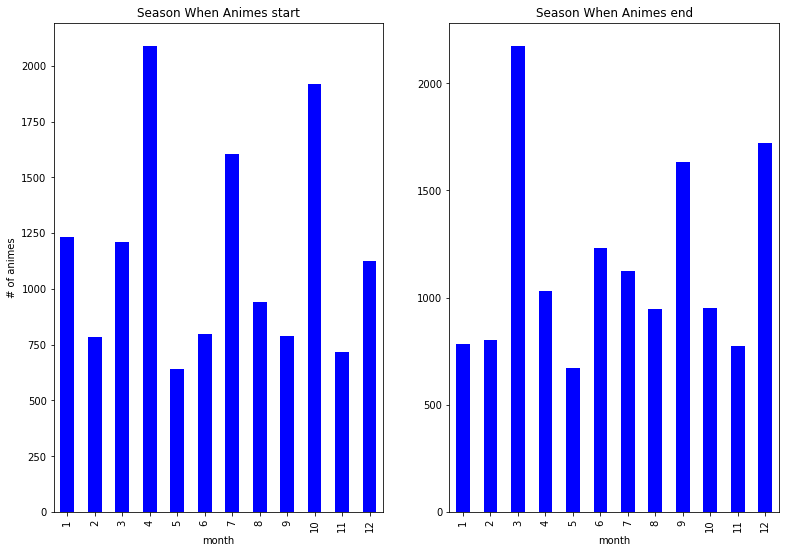

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(13,9), sharex=True)

anime_dataset.season_start.value_counts().sort_index().plot(kind='bar', color='blue', ax=ax[0])
ax[0].set_title('Season When Animes start')
ax[0].set_xlabel('month')
ax[0].set_ylabel('# of animes')

anime_dataset.season_end.value_counts().sort_index().plot(kind='bar', color='blue', ax=ax[1])
ax[1].set_title('Season When Animes end')
ax[1].set_xlabel('month')

plt.show()

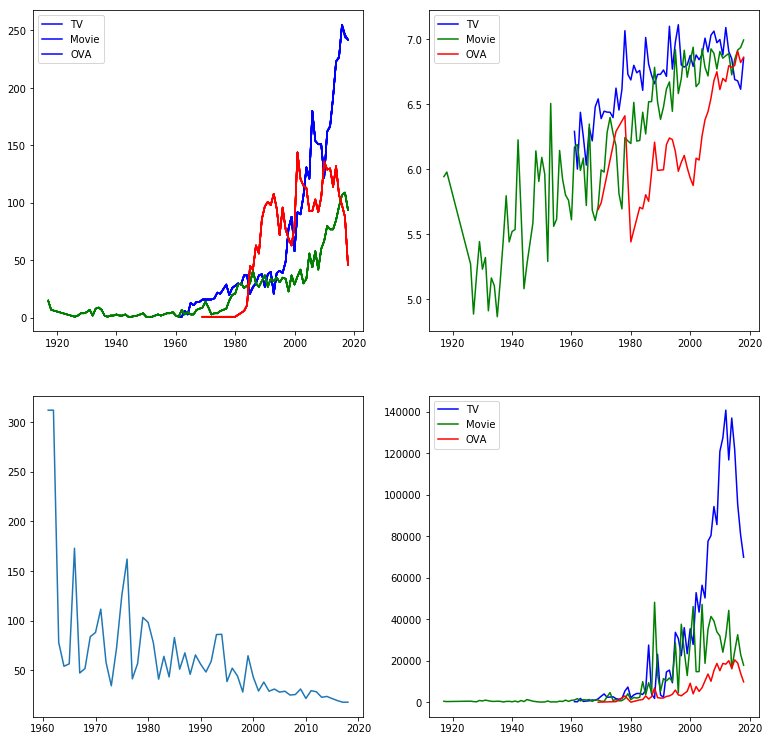

In [99]:
year_TV_count = anime_dataset[anime_dataset.anime_type=='TV'].groupby(anime_dataset.year_start).count().drop([2019, 2020])
year_Movie_count = anime_dataset[anime_dataset.anime_type=='Movie'].groupby(anime_dataset.year_start).count().drop([2019, 2020])
year_OVA_count = anime_dataset[anime_dataset.anime_type=='OVA'].groupby(anime_dataset.year_start).count().drop([2019])

year_TV_score_mean = anime_dataset[anime_dataset.anime_type=='TV'].groupby(anime_dataset.year_start).score.mean().drop([2019, 2020])
year_Movie_score_mean = anime_dataset[anime_dataset.anime_type=='Movie'].groupby(anime_dataset.year_start).score.mean().drop([2019, 2020])
year_OVA_score_mean = anime_dataset[anime_dataset.anime_type=='OVA'].groupby(anime_dataset.year_start).score.mean().drop([2019])

year_TV_ep_mean = anime_dataset[anime_dataset.anime_type=='TV'].groupby(anime_dataset.year_start).num_episodes.mean().drop([2019, 2020])

year_TV_pop_mean = anime_dataset[anime_dataset.anime_type=='TV'].groupby(anime_dataset.year_start).popularity.mean().drop([2019, 2020])
year_Movie_pop_mean = anime_dataset[anime_dataset.anime_type=='Movie'].groupby(anime_dataset.year_start).popularity.mean().drop([2019, 2020])
year_OVA_pop_mean = anime_dataset[anime_dataset.anime_type=='OVA'].groupby(anime_dataset.year_start).popularity.mean().drop([2019])


fig, ax = plt.subplots(2, 2, figsize=(13, 13))

ax[0][0].plot(year_TV_count, color='blue')
ax[0][0].plot(year_Movie_count, color='green')
ax[0][0].plot(year_OVA_count, color='red')
ax[0][0].legend(['TV', 'Movie', 'OVA'], loc='upper left')

ax[0][1].plot(year_TV_score_mean, color='blue')
ax[0][1].plot(year_Movie_score_mean, color='green')
ax[0][1].plot(year_OVA_score_mean, color='red')
ax[0][1].legend(['TV', 'Movie', 'OVA'], loc='upper left')

ax[1][0].plot(year_TV_ep_mean)

ax[1][1].plot(year_TV_pop_mean, color='blue')
ax[1][1].plot(year_Movie_pop_mean, color='green')
ax[1][1].plot(year_OVA_pop_mean, color='red')
ax[1][1].legend(['TV', 'Movie', 'OVA'], loc='upper left')

plt.show()

In [83]:
anime_dataset[anime_dataset.anime_type=='OVA'].groupby(anime_dataset.year_start).score.mean()

year_start
1969    5.690000
1970    5.740000
1975    6.290000
1978    6.410000
1980    5.440000
1983    5.706667
1984    5.693636
1985    5.802667
1986    5.752381
1987    5.978571
1988    6.207143
1989    5.990233
1990    5.991959
1991    5.994752
1992    6.188980
1993    6.239444
1994    6.226316
1995    6.135694
1996    5.983229
1997    6.051688
1998    6.105217
1999    6.010476
2000    5.931375
2001    5.874167
2002    6.084132
2003    6.069565
2004    6.255664
2005    6.380000
2006    6.441398
2007    6.544757
2008    6.680761
2009    6.748857
2010    6.611838
2011    6.697907
2012    6.673538
2013    6.795263
2014    6.783485
2015    6.797103
2016    6.907245
2017    6.819773
2018    6.860217
2019    6.989412
Name: score, dtype: float64

In [27]:
list(counts.index)

[8, 1, 9, 2, 10, 3, 11, 4, 12, 5, 6, 7]